# Exercise 3 | TKO_7092 Evaluation of Machine Learning Methods 2024
## deadline: 14.2.2024 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Ruslan Hasanov

Student number: 2310614

Student email: ruhasa@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=15 (15NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 15-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 15NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 15NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals from 0m to 250m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. You can use third-party libraries (e.g. Scikit-learn) if you want for implementing e.g. the 15-nearest neighbor. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [1]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the datasets

In [2]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).

# Reading the input.csv
input_df = pd.read_csv('C:\\Users\\Comp-servis\\Desktop\\input.csv', header = None)

print('Number of rows and columns of input dataframe are:', input_df.shape) # Printing the dimensions
# Reading the output.csv
output_df = pd.read_csv('C:\\Users\\Comp-servis\\Desktop\\output.csv', header = None)
print('Number of rows and columns of output dataframe are:', output_df.shape) # Printing the dimensions

# Reading the coordinates.csv
coordinates_df = pd.read_csv('C:\\Users\\Comp-servis\\Desktop\\coordinates.csv', header = None)
print('Number of rows and columns of coordinates dataframe are:', coordinates_df.shape) # Printing the dimensions

Number of rows and columns of input dataframe are: (1691, 75)
Number of rows and columns of output dataframe are: (1691, 1)
Number of rows and columns of coordinates dataframe are: (1691, 2)


### Standardization of the predictor features (input.csv)

In [3]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this.

# Setting the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the data
scaled_input = pd.DataFrame(scaler.fit_transform(input_df.values))

### Functions and analysis code

In [4]:
# Include here all the functions and other relevant code that you need in order to implement the task.

# Note! Utilize the following two functions in your implementation:

### Function for calculating C-index ###
# y: array containing true label values.
# yp: array containing the predicted label values.

def cindex(y, yp):
    n = 0
    h_num = 0 
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n


### Function for calculating the pairwise spatial distances between the data points ###
# The function will return a n-by-n matrix of Euclidean distances. For example, the
# distance_matrix element at indices i,j will contain the spatial distance between 
# data point i and j. Note that the element value is 0 always when i==j.
# coordinate_array: n-by-2 array containing the coordinates of the exercise data points.
def cdists(coordinate_array):
    number_of_observations = coordinate_array.shape[0]
    distance_matrix = np.zeros((number_of_observations, number_of_observations))
    for i in range(0, number_of_observations):
        distance_matrix[i, :] = np.sqrt(np.sum((coordinate_array - coordinate_array[i])**2, axis=1))
    return distance_matrix

def spat_loocv(input_data, output_data, distance_parameters):
    
    # Calculating distance matrix based on coordinates data
    distance_matrix = cdists(coordinates_df.values)
    
    # Initializing KNN Regressor with 15 neighbors
    knn = KNeighborsRegressor(n_neighbors=15)
    
    # Creating an array of indices from 0 to the length of input_data
    all_ind = np.arange(len(input_data))
    
    # A List to store average C-index for each distance parameter
    c_index_list = []
    
    # Looping over each distance parameter
    for d in distance_parameters:
        
        # A list to store C-index for the current distance parameter
        c_index_d = []
        
        # Lists to store predicted and actual output values
        y_pred = []
        y_test = []
        
        # Loop for Leave-One-Out Cross Validation
        for i in range(len(input_data)):
            
            # Finding indices of nearest neighbors
            neighbors_indices = np.argsort(distance_matrix[i])  
            neighbors_inside_distance = []
            
            # Filtering neighbors based on distance threshold
            for index in neighbors_indices:
                if distance_matrix[i][index] > d:
                    break
                else:
                    neighbors_inside_distance.append(index)
            
            # Removing neighbors inside the distance threshold from the training set
            train_ind = np.delete(all_ind, neighbors_inside_distance)
            
            # Training KNN regressor on the modified training set
            knn.fit(input_data[train_ind], output_data[train_ind])
            
            # Predicting output for the current data point
            predictions = knn.predict(input_data[i].reshape(1, -1))
            y_pred.extend(predictions)
            
            # Appending actual output for the current data point
            y_test.extend(output_data[i])
        
        # Calculating C-index for the predictions made
        c_index = cindex(y_test, y_pred)
        c_index_d.append(c_index)        
        
        # Append average C-index for the current distance parameter
        c_index_list.append(np.mean(c_index_d))
        
    return c_index_list

### Results for spatial leave-one-out cross-validation with 15-nearest neighbor regression model

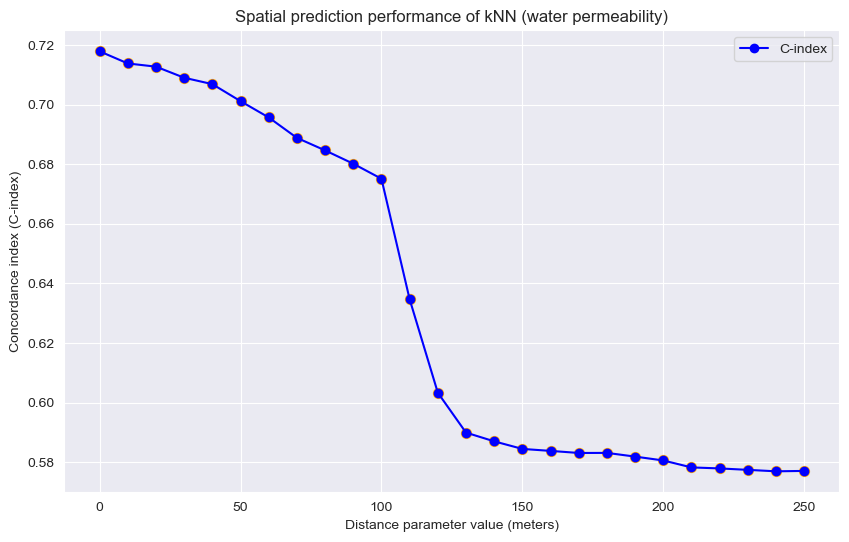

In [5]:
# Performing the Spatial leave-One-Out cross-validation with 15-nearest neighbor regression model and visualizing the results

# Converting input_data and output_data to arrays
X = input_df.values  
y = output_df.values

# Defining range of distance parameters
distance = range(0, 251, 10)

# Performing spatial leave-one-out cross-validation
c_ind = spat_loocv(X, y, distance)

# Creating an array of distances based on the length of c_ind
dist = np.arange(0, len(c_ind) * 10, 10)
    
# Setting the seaborn style
sns.set_style("darkgrid")

# Creating the figure
plt.figure(figsize=(10, 6))

# Plotting the data with markers and line style
plt.plot(dist, c_ind, marker='o', linestyle='-', color='blue', label='C-index')

# The title
plt.title('Spatial prediction performance of kNN (water permeability)')

# labels to x and y axes with font size
plt.xlabel('Distance parameter value (meters)')
plt.ylabel('Concordance index (C-index)')

# Adding a legend
plt.legend()

# Displaying grid lines
plt.grid(True)

# Customizing marker size and color
plt.scatter(dist, c_ind, color='orange', s=50, label='Data Points')

# Showing the plot
plt.show()

### Interpretation of the results

In [6]:
# In this cell, give a brief commentary on the results, what happens to the prediction 
# performance as the prediction distance increases?

According to the graph above, it can be seen that the performance value (C-index) decreases as the prediction distance increases ,as expected, since the spatial data is used. The c-index value is above or around 0.7 from the distance 0 to aprroximately 50 m. A sharp decrease in model performance is noticable at the distance of 100 m. The model can perform good results up to 100 m prediction range. It should be advised that this model should not be implemented after this limit of 100 m prediction range, due to a sharp performance drop.